In [1]:
import shap

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Causal Shapley Values - Test 1

In [15]:
from simulations import simulation1, simulation2
from shapley_values.causal_shap_paper import CausalExplainer, EffectType
from shapley_values.utils import get_baseline

import numpy as np
import xgboost

np.random.seed(0)

X_test1, y_test1 = simulation1(num_samples=10000)

model_test1 = xgboost.XGBRegressor()
model_test1.fit(X_test1, y_test1)

feature_names = ["P", "F"]

sample = np.array([1.06, 2.7])

explainer = CausalExplainer(X = X_test1, model = model_test1, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, effect_type= EffectType.TOTAL, causal_model=[[0], [1]], confounding=[False, False], is_asymmetric=False)

Baseline Value (E[f(X)]):  0.93608016
Predicted Value (f(x))  [1.5081624]
Shapley Values + (E[f(X)]):  1.508


In [17]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),
                                output_names=['Prediction'])

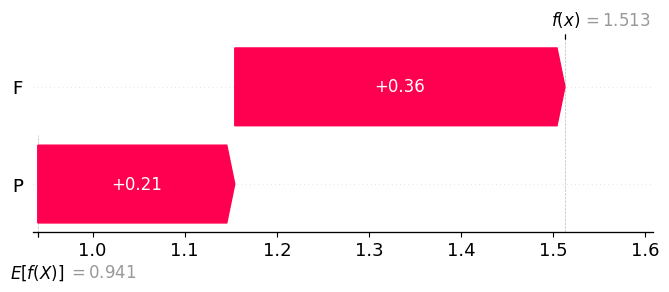

In [18]:
shap.plots.waterfall(explanation)

## Causal Shapley Values - Test 2

In [26]:

X_test2, y_test2 = simulation2(num_samples=10000)
model_test2 = xgboost.XGBRegressor()
model_test2.fit(X_test2, y_test2)


feature_names = ["P", "F"]

sample = np.array([4, 3.8])


explainer = CausalExplainer(X = X_test2, model = model_test2, is_classification=False, rounding_precision = 1, feature_names = feature_names)
phis = explainer.compute_shapley_values(sample, effect_type= EffectType.INDIRECT, causal_model=[[1], [0]], confounding=[False, False], is_asymmetric=False)

Baseline Value (E[f(X)]):  0.9801547
Predicted Value (f(x))  [3.711208]
Shapley Values + (E[f(X)]):  0.996


In [27]:
explanation = shap.Explanation(values=np.array(phis),
                                feature_names=feature_names,
                                base_values=get_baseline(X_test1, model_test1),
                                output_names=['Prediction'])

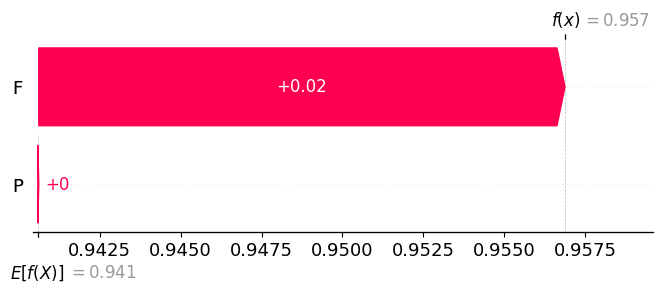

In [28]:
shap.plots.waterfall(explanation)